In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7ebe6c7d6989403633ef84fbeb007be


In [19]:
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muniz freire
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | saint anthony
Processing Record 7 of Set 1 | roebourne
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | dapdap
Processing Record 11 of Set 1 | oriximina
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | bage
Processing Record 15 of Set 1 | nusaybin
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | juegang
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | cherskiy
Processing R

Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | muyezerskiy
Processing Record 42 of Set 4 | paramonga
Processing Record 43 of Set 4 | tangzhai
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | saint-georges
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | wad madani
Processing Record 48 of Set 4 | matagami
Processing Record 49 of Set 4 | luau
Processing Record 50 of Set 4 | akureyri
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | sal rei
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | belomorsk
Processing Record 5 of Set 5 | santiago do cacem
Processing Record 6 of Set 5 | mayumba
Processing Record 7 of Set 5 | magrath
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | chokurdakh
Processing Record 10 of Set 5 | tabuk
Processing Record 11 of Set 5 | kiruna
Processing Record 12 of Set 5 | arraial do cabo
Processing Record 13 of Set 5

Processing Record 31 of Set 8 | innisfail
Processing Record 32 of Set 8 | tabas
Processing Record 33 of Set 8 | tamandare
Processing Record 34 of Set 8 | zielona gora
Processing Record 35 of Set 8 | abeche
Processing Record 36 of Set 8 | rio claro
Processing Record 37 of Set 8 | fallon
Processing Record 38 of Set 8 | lluta
Processing Record 39 of Set 8 | nurota
Processing Record 40 of Set 8 | beaverlodge
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | lingao
Processing Record 43 of Set 8 | nguiu
City not found. Skipping...
Processing Record 44 of Set 8 | matara
Processing Record 45 of Set 8 | gulshat
City not found. Skipping...
Processing Record 46 of Set 8 | waingapu
Processing Record 47 of Set 8 | kharabali
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8 | noumea
Processing Record 50 of Set 8 | svetlogorsk
Processing Record 1 of Set 9 | raudeberg
Processing Record 2 of Set 9 | borova
Processing Record 3 of S

Processing Record 19 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 12 | san juan
Processing Record 21 of Set 12 | kloulklubed
Processing Record 22 of Set 12 | berlevag
Processing Record 23 of Set 12 | ikwiriri
Processing Record 24 of Set 12 | speedway
Processing Record 25 of Set 12 | charters towers
Processing Record 26 of Set 12 | domoni
Processing Record 27 of Set 12 | farsund
Processing Record 28 of Set 12 | neuquen
Processing Record 29 of Set 12 | tosya
Processing Record 30 of Set 12 | hervey bay
Processing Record 31 of Set 12 | kushmurun
Processing Record 32 of Set 12 | ballina
Processing Record 33 of Set 12 | bartica
Processing Record 34 of Set 12 | sahrak
City not found. Skipping...
Processing Record 35 of Set 12 | dali
Processing Record 36 of Set 12 | koungou
Processing Record 37 of Set 12 | markala
Processing Record 38 of Set 12 | bac lieu
Processing Record 39 of Set 12 | barcelona
Processing Record 40 of Set 12 | san andres
Processing Record 41 of Set 12 |

In [23]:
print(len(city_data))

566


In [24]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muniz Freire,-20.46,-41.41,63.32,94,90,4.45,BR,2020-08-21 03:06:53
1,Tuktoyaktuk,69.45,-133.04,55.40,76,90,9.17,CA,2020-08-21 03:05:48
2,Lebu,-37.62,-73.65,49.19,84,0,15.57,CL,2020-08-21 03:05:55
3,Port Alfred,-33.59,26.89,56.86,79,79,10.07,ZA,2020-08-21 03:05:46
4,Rikitea,-23.12,-134.97,66.18,78,100,25.34,PF,2020-08-21 03:05:43


In [25]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muniz Freire,BR,2020-08-21 03:06:53,-20.46,-41.41,63.32,94,90,4.45
1,Tuktoyaktuk,CA,2020-08-21 03:05:48,69.45,-133.04,55.40,76,90,9.17
2,Lebu,CL,2020-08-21 03:05:55,-37.62,-73.65,49.19,84,0,15.57
3,Port Alfred,ZA,2020-08-21 03:05:46,-33.59,26.89,56.86,79,79,10.07
4,Rikitea,PF,2020-08-21 03:05:43,-23.12,-134.97,66.18,78,100,25.34


In [26]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

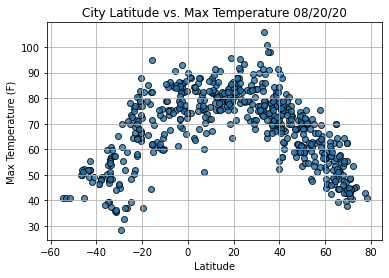

In [28]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

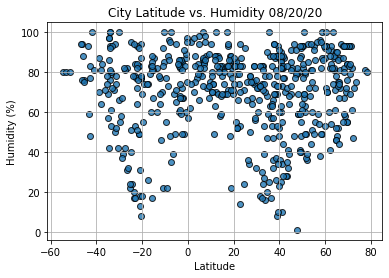

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

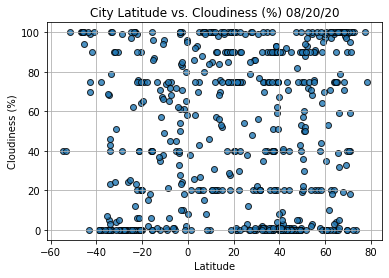

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

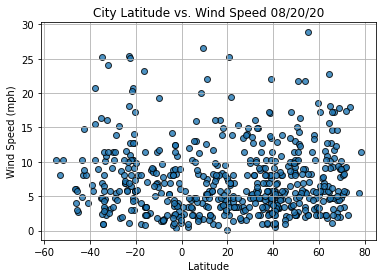

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

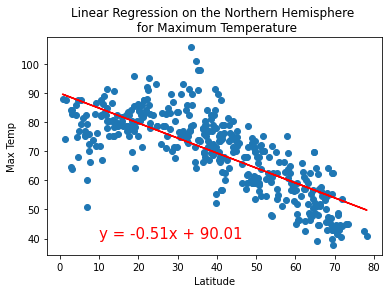

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

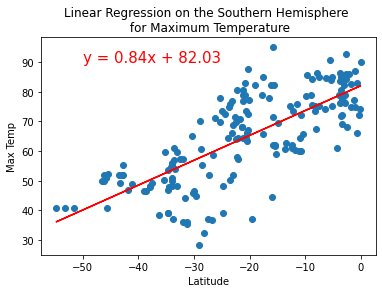

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

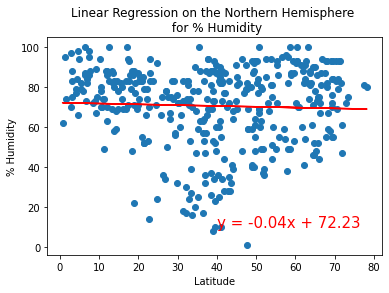

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

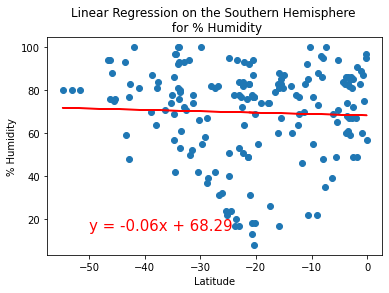

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

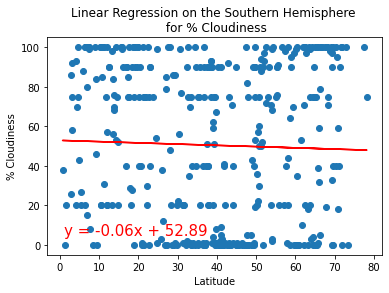

In [66]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(1,5))

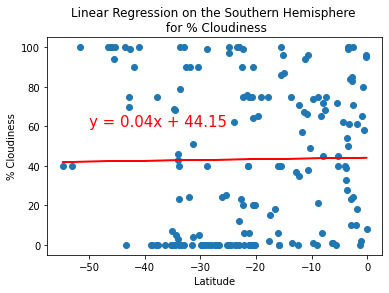

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

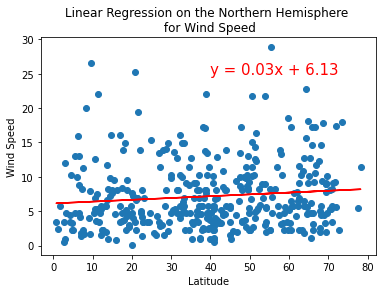

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

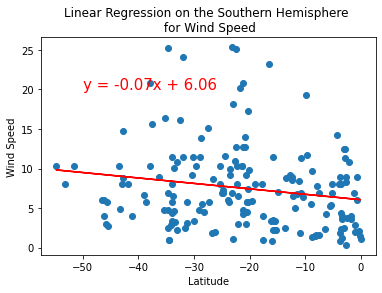

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))